In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

np.set_printoptions(suppress=True)

In [7]:
def load_data(name , label):

    feature = pickle.load(open(name,'rb'))
    label   = pickle.load(open(label,'rb'))
    
    return feature , label


def split_data(X,y):
    X_train , X_test , y_train , y_test = train_test_split(np.array(X) , np.array(y) , test_size=0.2)
    return X_train , X_test , y_train , y_test

def recale(X_train , X_test):
    return X_train / 255 , X_test / 255

In [13]:
# Load base model

base_model = tf.keras.applications.MobileNetV2(input_shape=(128,128,3) , 
                                               include_top=False,
                                              weights='imagenet')
base_model.trainable = False

# Flatten layer
average_pooling = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
# Output layer
prediction_layer = tf.keras.layers.Dense(units=1 , activation='sigmoid')(average_pooling)


# Custom head
model = tf.keras.models.Model(inputs=base_model.input , outputs=prediction_layer)

X , y = load_data('feature_rgb.pickle' , 'label_rgb.pickle')
X_train , X_test , y_train , y_test = split_data(X,y)
X_train , X_test = recale(X_train , X_test)

In [14]:
len(y_train)

20000

In [15]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
             loss='binary_crossentropy',
             metrics=['accuracy'])


history = model.fit(X_train , y_train , validation_data=(X_test , y_test), batch_size=128,
         verbose=1,
         epochs=25)

Epoch 1/25
157/157 [==============================] - 18s 60ms/step - loss: 0.6585 - accuracy: 0.6485 - val_loss: 0.3287 - val_accuracy: 0.8852
Epoch 2/25
157/157 [==============================] - 8s 50ms/step - loss: 0.2259 - accuracy: 0.9263 - val_loss: 0.1695 - val_accuracy: 0.9394
Epoch 3/25
157/157 [==============================] - 8s 50ms/step - loss: 0.1420 - accuracy: 0.9495 - val_loss: 0.1307 - val_accuracy: 0.9482
Epoch 4/25
157/157 [==============================] - 8s 50ms/step - loss: 0.1169 - accuracy: 0.9566 - val_loss: 0.1150 - val_accuracy: 0.9556
Epoch 5/25
157/157 [==============================] - 8s 50ms/step - loss: 0.1054 - accuracy: 0.9596 - val_loss: 0.1071 - val_accuracy: 0.9586
Epoch 6/25
157/157 [==============================] - 8s 51ms/step - loss: 0.0988 - accuracy: 0.9621 - val_loss: 0.1021 - val_accuracy: 0.9592
Epoch 7/25
157/157 [==============================] - 8s 51ms/step - loss: 0.0943 - accuracy: 0.9639 - val_loss: 0.0989 - val_accuracy: 0.960

In [16]:
loss , accuracy = model.evaluate(X_test , y_test)
print('loss:',loss )
print('Accuracy',accuracy)

157/157 [==============================] - 3s 17ms/step - loss: 0.0853 - accuracy: 0.9652
loss: 0.08528061211109161
Accuracy 0.9652000069618225


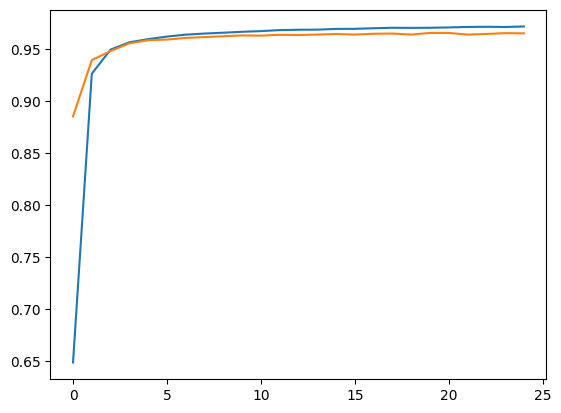

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

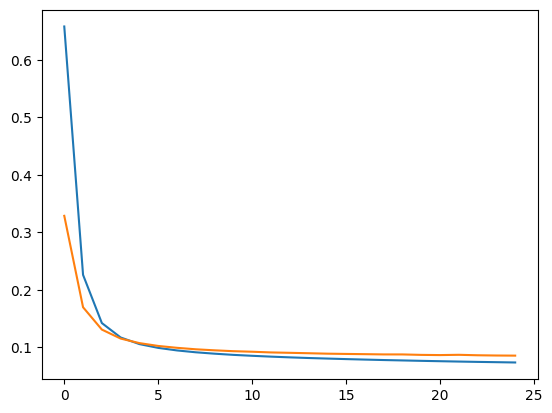

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

157/157 [==============================] - 2s 13ms/step


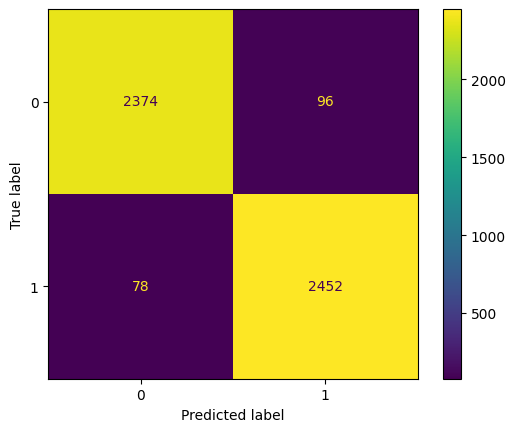

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix
y_pred = np.where(model.predict(X_test) >0.5 , 1 , 0)
ConfusionMatrixDisplay(confusion_matrix(y_test , y_pred)).plot()